In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
data = pd.read_csv('/content/layoffs_data.csv')
data.shape
data

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Oda,Oslo,Food,150.0,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,NaN,Unknown
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown
4,Yext,New York City,Marketing,NaN,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.12,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
3637,Service,Los Angeles,Travel,NaN,2020-03-16,https://techcrunch.com/2020/03/16/travel-savin...,5.1,Seed,2020-08-31 15:17:26,United States,1.00,Unknown
3638,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,0.10,Unknown
3639,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,0.75,Unknown
3640,Tamara Mellon,Los Angeles,Retail,20.0,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,0.40,Unknown


In [ ]:
print(data.isna().sum())
data = data.dropna()

Company                          0
Location_HQ                      0
Industry                         0
Laid_Off_Count                1253
Date                             0
Source                           0
Funds_Raised                   390
Stage                            0
Date_Added                       0
Country                          0
Percentage                    1300
List_of_Employees_Laid_Off       0
dtype: int64


In [ ]:
print(data.isna().sum())
data

Company                       0
Location_HQ                   0
Industry                      0
Laid_Off_Count                0
Date                          0
Source                        0
Funds_Raised                  0
Stage                         0
Date_Added                    0
Country                       0
Percentage                    0
List_of_Employees_Laid_Off    0
dtype: int64


,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown
6,OrCam,Jerusalem,Healthcare,100.0,2024-06-03,https://www.calcalistech.com/ctechnews/article...,86.0,Unknown,2024-06-04 03:47:34,Israel,0.50,Unknown
13,Walnut,New York City,Sales,15.0,2024-05-29,https://www.calcalistech.com/ctechnews/article...,56.0,Series B,2024-05-31 10:49:24,United States,0.20,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
3635,Inspirato,Denver,Travel,130.0,2020-03-16,https://businessden.com/2020/03/16/inspirato-c...,79.0,Series C,2020-03-31 14:45:56,United States,0.22,Unknown
3636,Help.com,Austin,Support,16.0,2020-03-16,LinkedIn,6.0,Seed,2020-04-16 06:36:06,United States,1.00,Unknown
3638,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,0.10,Unknown
3639,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,0.75,Unknown


In [ ]:
!pip install countryinfo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.2/602.2 kB 12.6 MB/s eta 0:00:00


In [ ]:
import countryinfo

def get_continent(country):
    try:
        country_info = countryinfo.CountryInfo(country)
        return country_info.region()
    except KeyError:
        return "Unknown"

data['Continent'] = data['Country'].apply(get_continent)

<ipython-input-9-c96f40916def>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Continent'] = data['Country'].apply(get_continent)


In [ ]:
data.head(10)

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off,Continent
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown,Asia
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown,Asia
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown,Americas
6,OrCam,Jerusalem,Healthcare,100.0,2024-06-03,https://www.calcalistech.com/ctechnews/article...,86.0,Unknown,2024-06-04 03:47:34,Israel,0.50,Unknown,Asia
13,Walnut,New York City,Sales,15.0,2024-05-29,https://www.calcalistech.com/ctechnews/article...,56.0,Series B,2024-05-31 10:49:24,United States,0.20,Unknown,Americas
16,Lucid Motors,SF Bay Area,Transportation,400.0,2024-05-24,https://electrek.co/2024/05/24/lucid-lcid-cuts...,8300.0,Post-IPO,2024-05-24 15:47:21,United States,0.06,Unknown,Americas
17,Foursquare,New York City,Marketing,105.0,2024-05-23,https://techcrunch.com/2024/05/23/foursquare-j...,390.0,Series G,2024-05-24 15:46:13,United States,0.25,Unknown,Americas
18,Guild,Denver,Education,300.0,2024-05-22,https://www.denverpost.com/2024/05/22/educatio...,643.0,Series F,2024-05-23 02:17:46,United States,0.25,Unknown,Americas
19,Cue Health,San Diego,Healthcare,180.0,2024-05-22,https://www.fiercebiotech.com/medtech/home-cov...,899.0,Post-IPO,2024-05-23 04:11:46,United States,1.00,Unknown,Americas
24,Replit,SF Bay Area,Product,30.0,2024-05-16,https://www.theinformation.com/briefings/ai-co...,222.0,Unknown,2024-05-16 18:11:36,United States,0.20,Unknown,Americas


#Sum of Laid off Count for each continenet


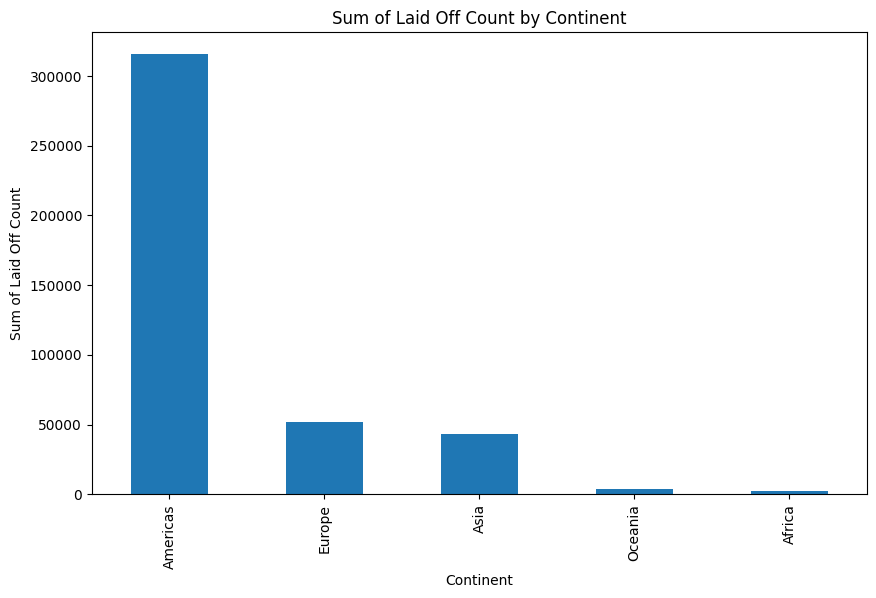

In [ ]:
# Calculate the sum of Laid_Off_Count for each continent
continent_sums = data.groupby('Continent')['Laid_Off_Count'].sum().sort_values(ascending=False)

# Draw a bar chart to compare
plt.figure(figsize=(10, 6))
continent_sums.plot(kind='bar')
plt.title('Sum of Laid Off Count by Continent')
plt.xlabel('Continent')
plt.ylabel('Sum of Laid Off Count')
plt.show()

#Sum of Laid off Count by countries

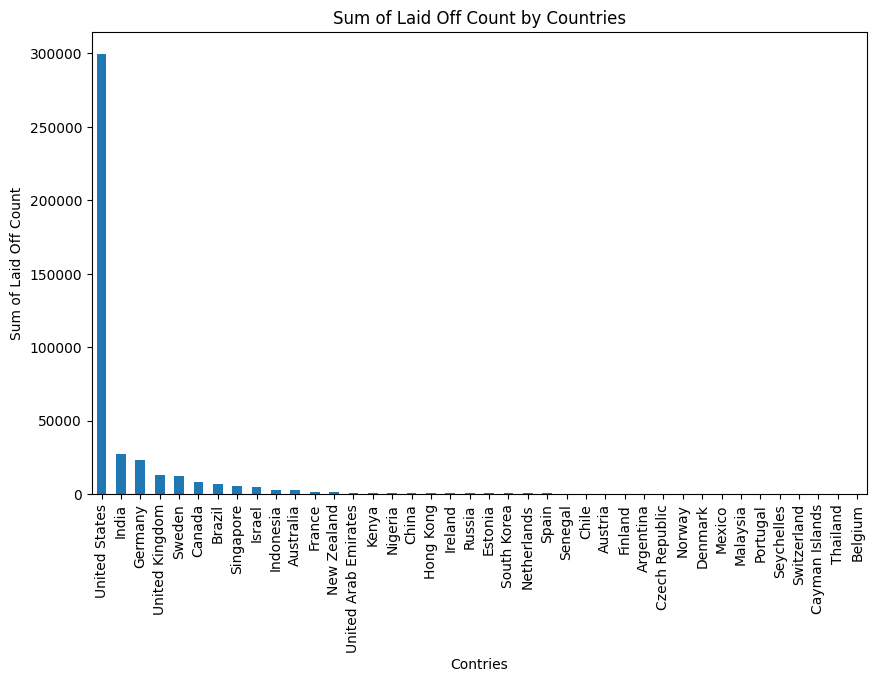

In [ ]:
country_sums = data.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
country_sums.plot(kind='bar')
plt.title('Sum of Laid Off Count by Countries')
plt.xlabel('Contries')
plt.ylabel('Sum of Laid Off Count')
plt.show()

#Sum of Laid off Count by Top 5 Countries & by remaining countries

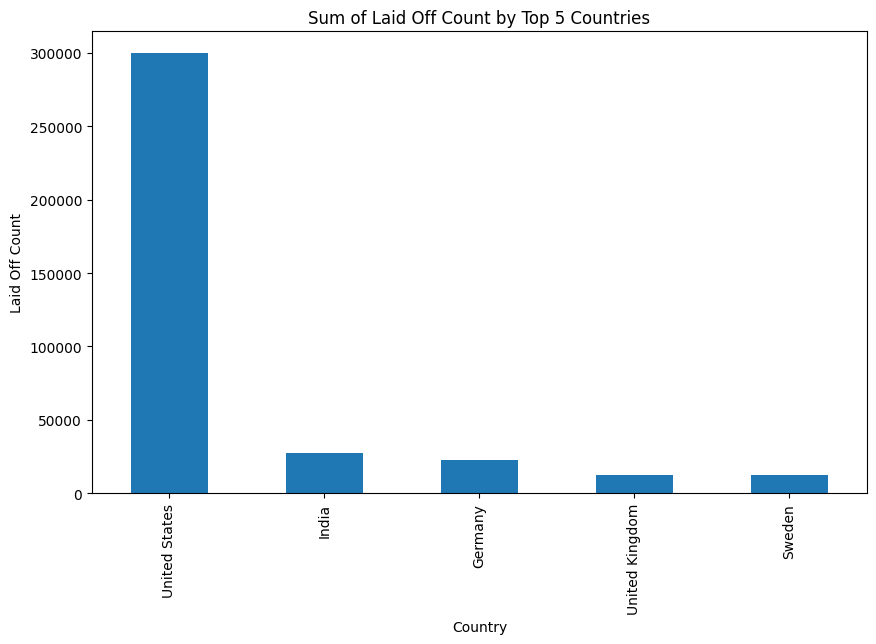

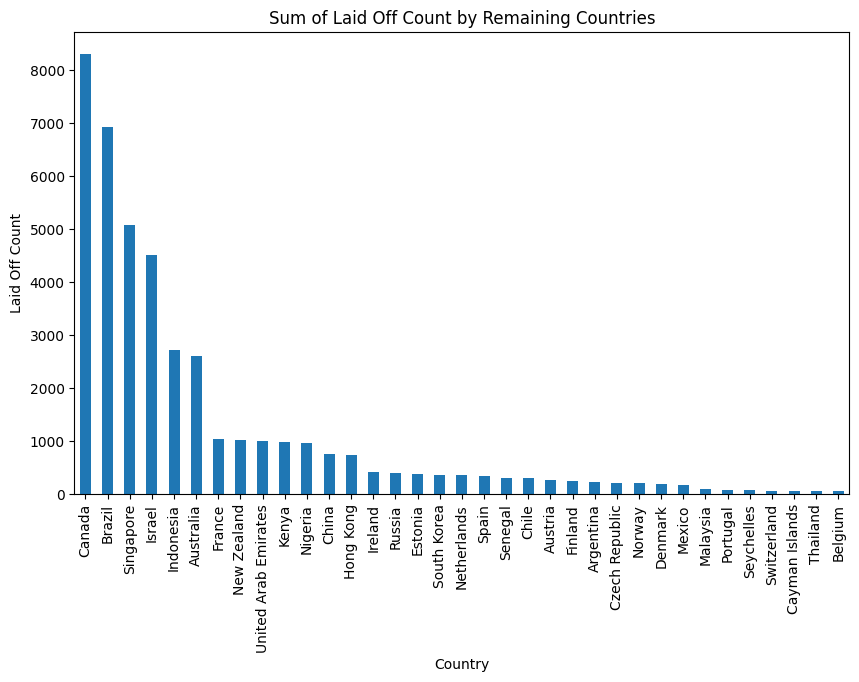

In [ ]:
country_sums = data.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False)
top_5_countries = country_sums.head(5)

plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar')
plt.title('Sum of Laid Off Count by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Laid Off Count')
plt.show()

plt.figure(figsize=(10, 6))
remaining_countries = country_sums.iloc[5:]
remaining_countries.plot(kind='bar')
plt.title('Sum of Laid Off Count by Remaining Countries')
plt.xlabel('Country')
plt.ylabel('Laid Off Count')
plt.show()

#Sum Of Laid off count of Americas,Europe,Asian Top 3 Countries

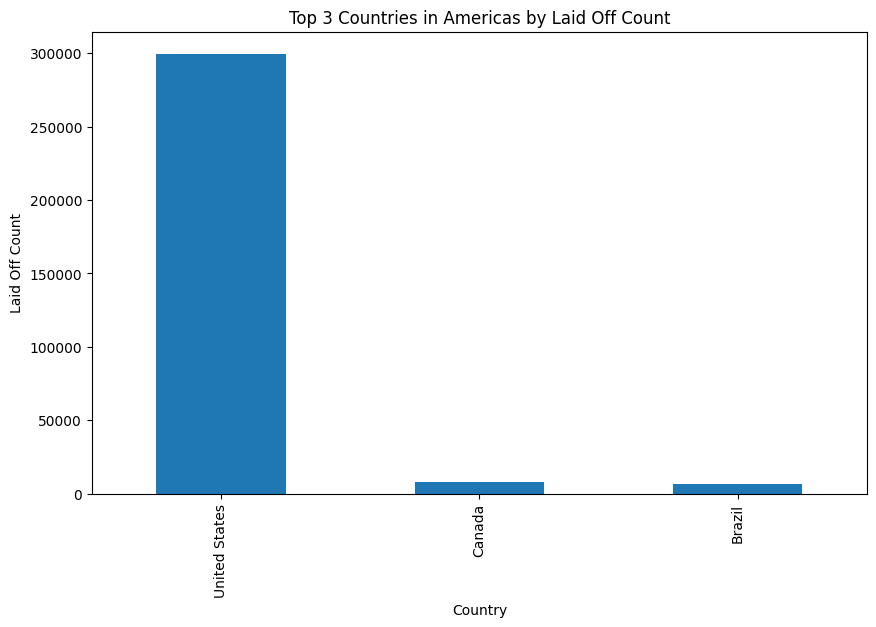

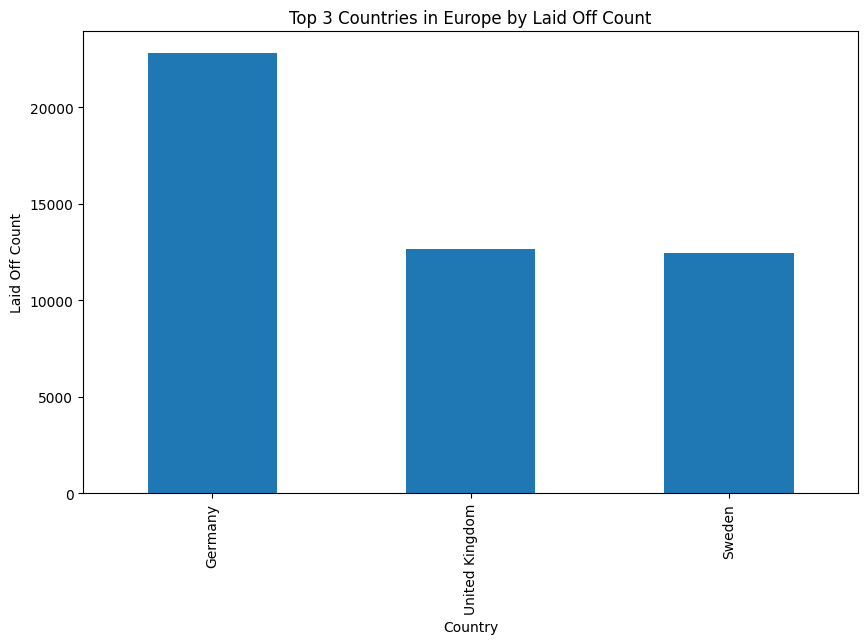

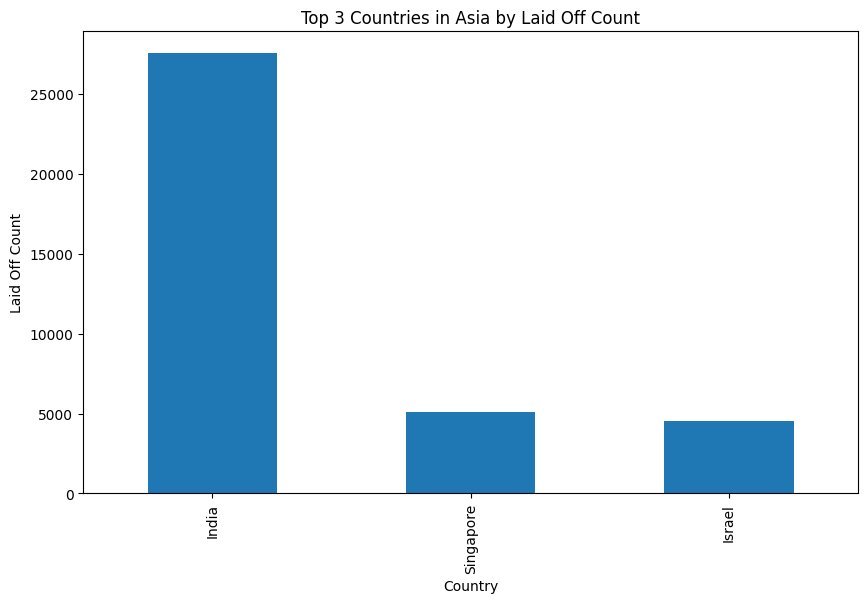

In [ ]:
asia_data = data[data['Continent'] == 'Americas']
asia_country_sums = asia_data.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False)
top_3_asia_countries = asia_country_sums.head(3)

plt.figure(figsize=(10, 6))
top_3_asia_countries.plot(kind='bar')
plt.title('Top 3 Countries in Americas by Laid Off Count')
plt.xlabel('Country')
plt.ylabel('Laid Off Count')
plt.show()

asia_data = data[data['Continent'] == 'Europe']
asia_country_sums = asia_data.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False)
top_3_asia_countries = asia_country_sums.head(3)

plt.figure(figsize=(10, 6))
top_3_asia_countries.plot(kind='bar')
plt.title('Top 3 Countries in Europe by Laid Off Count')
plt.xlabel('Country')
plt.ylabel('Laid Off Count')
plt.show()

asia_data = data[data['Continent'] == 'Asia']
asia_country_sums = asia_data.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False)
top_3_asia_countries = asia_country_sums.head(3)

plt.figure(figsize=(10, 6))
top_3_asia_countries.plot(kind='bar')
plt.title('Top 3 Countries in Asia by Laid Off Count')
plt.xlabel('Country')
plt.ylabel('Laid Off Count')
plt.show()

#Top 3 countries by lay-off count in America,Asia,Europe

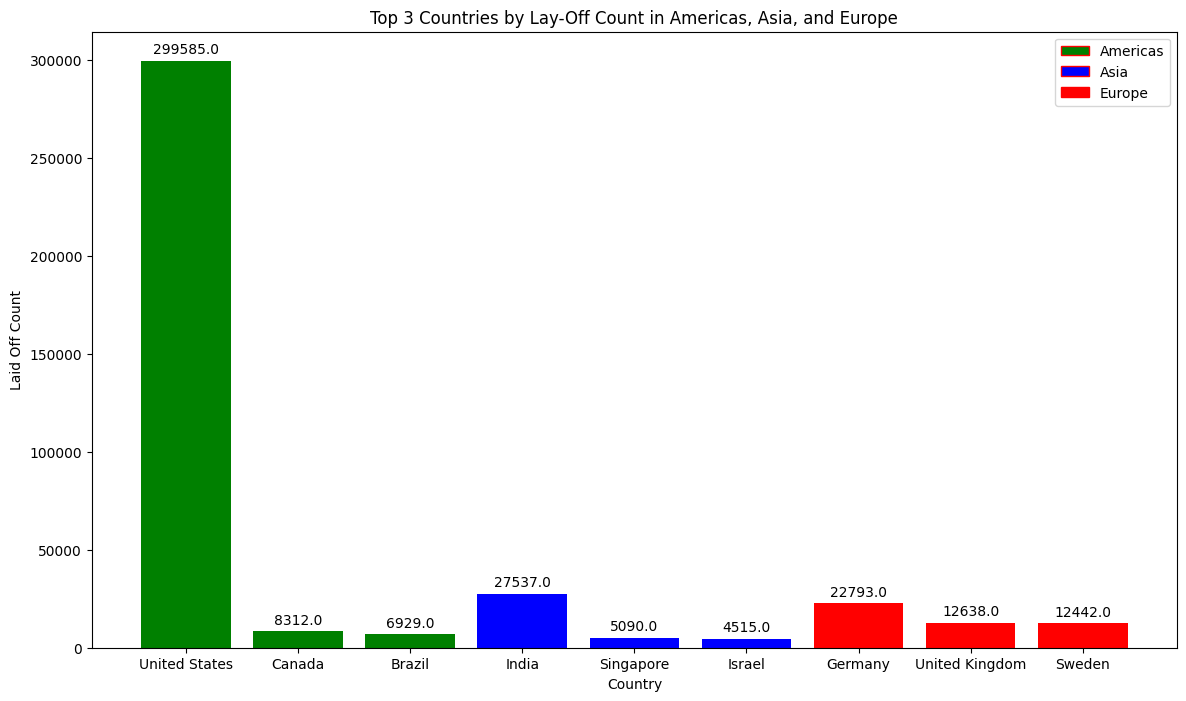

In [ ]:
# Aggregate the data by country and continent
country_data = data.groupby(['Country', 'Continent'])['Laid_Off_Count'].sum().reset_index()

# Top countries by lay-off count for each continent
top_americas = country_data[country_data['Continent'] == 'Americas'].nlargest(3, 'Laid_Off_Count')
top_asia = country_data[country_data['Continent'] == 'Asia'].nlargest(3, 'Laid_Off_Count')
top_europe = country_data[country_data['Continent'] == 'Europe'].nlargest(3, 'Laid_Off_Count')

# Combine the top countries
top_countries = pd.concat([top_americas, top_asia, top_europe])

# Set color for each continent
colors = ['green' if continent == 'Americas' else 'blue' if continent == 'Asia' else 'red' for continent in top_countries['Continent']]

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(top_countries['Country'], top_countries['Laid_Off_Count'], color=colors)

# Add labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Laid Off Count')
ax.set_title('Top 3 Countries by Lay-Off Count in Americas, Asia, and Europe')

# Add the colors legend manually
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', edgecolor='r', label='Americas'),
    Patch(facecolor='blue', edgecolor='r', label='Asia'),
    Patch(facecolor='red', edgecolor='r', label='Europe')
]
ax.legend(handles=legend_elements, loc='upper right')

# Annotate the bars with the lay-off count
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

#Lay-off by country & percantage of People laid-off

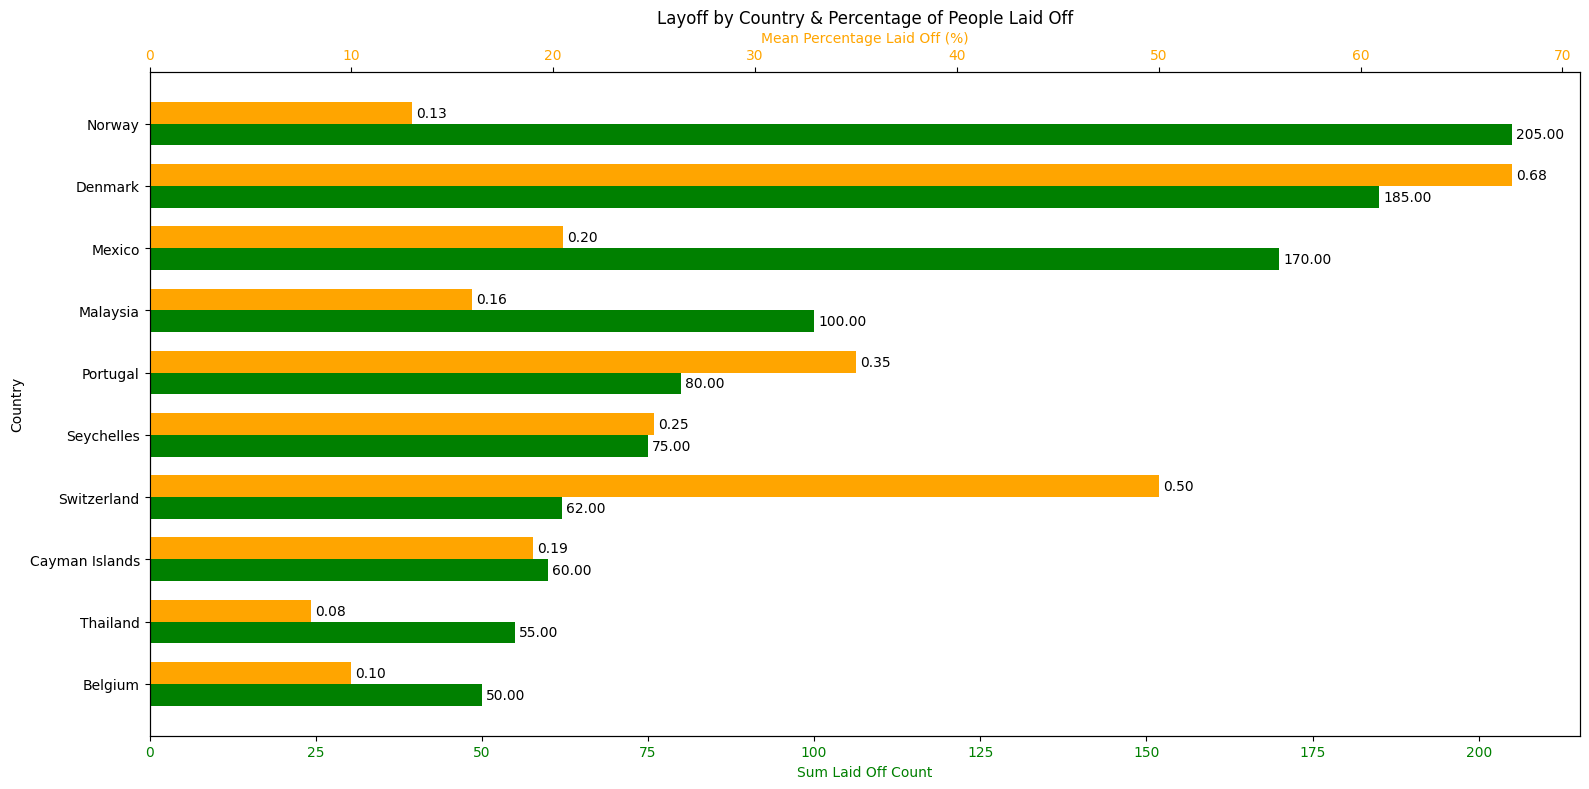

In [ ]:
country_data = data.groupby('Country').agg({
    'Laid_Off_Count': 'sum',
    'Percentage': 'mean'
}).reset_index()

# Sort by Laid_Off_Count and get the top 10 countries
top_10_countries = country_data.sort_values(by='Laid_Off_Count', ascending=True).head(10)

# Prepare data for the grouped bar chart
labels = top_10_countries['Country']
laid_off_counts = top_10_countries['Laid_Off_Count']
percentages = top_10_countries['Percentage']

y = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot Laid Off Count on primary y-axis
rects1 = ax1.barh(y - width/2, laid_off_counts, width, label='Laid Off Count', color='green')
ax1.set_ylabel('Country')
ax1.set_xlabel('Sum Laid Off Count', color='green')
ax1.tick_params(axis='x', labelcolor='green')

# Create secondary x-axis for Percentage
ax2 = ax1.twiny()
rects2 = ax2.barh(y + width/2, percentages * 100, width, label='Percentage Laid Off', color='orange')
ax2.set_xlabel('Mean Percentage Laid Off (%)', color='orange')
ax2.tick_params(axis='x', labelcolor='orange')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax1.set_title('Layoff by Country & Percentage of People Laid Off')
ax1.set_yticks(y)
ax1.set_yticklabels(labels)
fig.tight_layout()

# Function to add labels on the bars
def autolabel(rects, ax, scale=1):
    for rect in rects:
        width = rect.get_width()
        ax.annotate(f'{width/scale:.2f}',
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center')

autolabel(rects1, ax1, scale=1)
autolabel(rects2, ax2, scale=100)

fig.tight_layout()  # Adjust layout to make room for the x-labels

plt.show()

#Distribution of lay-ff percentages by country

<ipython-input-17-61df56904c35>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Percentage'] = pd.to_numeric(filtered_data['Percentage'], errors='coerce')


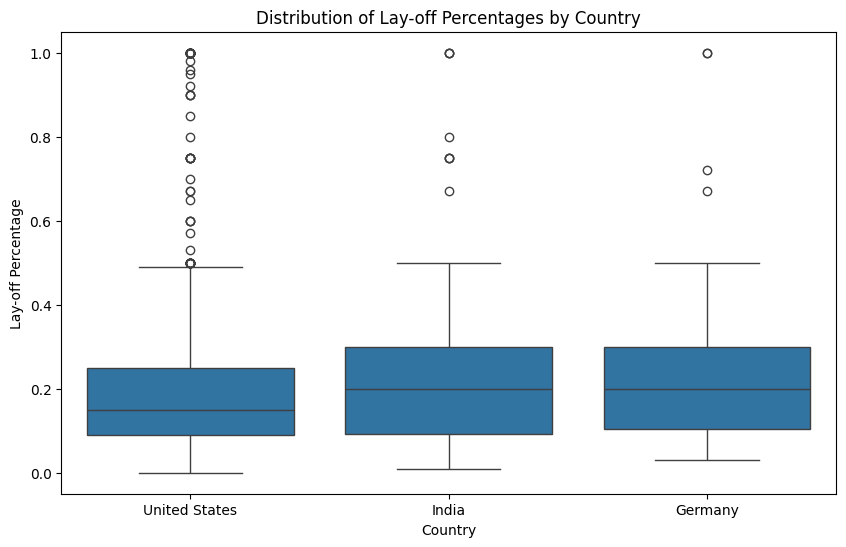

In [ ]:
# Filter data for specified countries
countries_of_interest = ['United States', 'India', 'Germany']
filtered_data = data[data['Country'].isin(countries_of_interest)]

# Convert 'Percentage' column to numeric, coercing errors to NaN
filtered_data['Percentage'] = pd.to_numeric(filtered_data['Percentage'], errors='coerce')

# Drop rows with NaN values in 'Percentage' column
filtered_data = filtered_data.dropna(subset=['Percentage'])

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x='Country', y='Percentage', data=filtered_data)

# Add titles and labels
plt.title('Distribution of Lay-off Percentages by Country')
plt.xlabel('Country')
plt.ylabel('Lay-off Percentage')

# Show the plot
plt.show()


#Sum of laid-off Count by top 20 Companies


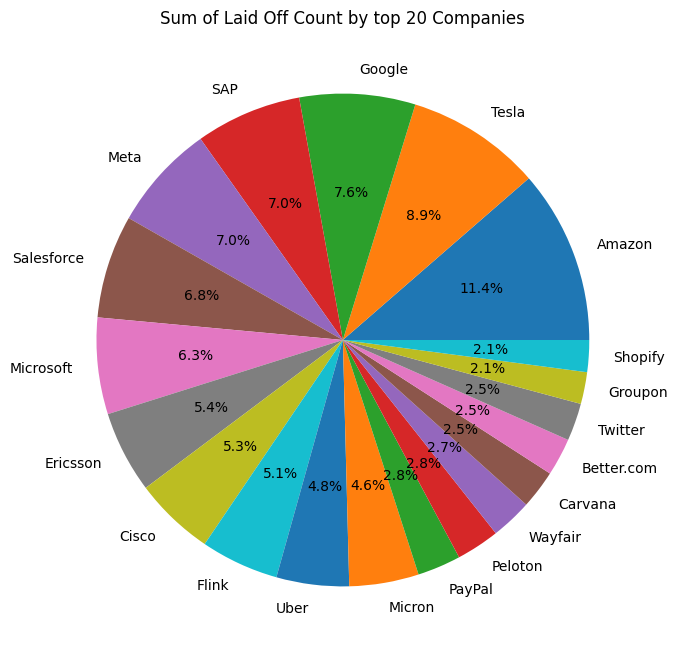

In [ ]:
company_data = data.groupby('Company')['Laid_Off_Count'].sum().reset_index()
company_data = company_data.sort_values('Laid_Off_Count', ascending=False).head(20)

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(company_data['Laid_Off_Count'], labels=company_data['Company'], autopct='%1.1f%%')
plt.title('Sum of Laid Off Count by top 20 Companies')
plt.show()

#Heat-map of lay-offs by country

In [ ]:
import plotly.express as px

country_layoffs = data.groupby('Country')['Laid_Off_Count'].sum().reset_index()

# Vẽ bản đồ nhiệt
fig = px.choropleth(country_layoffs,
                    locations="Country",
                    locationmode='country names',
                    color="Laid_Off_Count",
                    hover_name="Country",
                    color_continuous_scale=[
                        (0.0, "rgb(255, 255, 204)"), # Vàng nhạt
                        (0.33, "rgb(255, 204, 102)"), # Vàng cam
                        (0.66, "rgb(255, 102, 102)"), # Cam đỏ
                        (1.0, "rgb(204, 0, 0)")       # Đỏ đậm
                    ],
                    title='Heat Map of Layoffs by Country')

fig.update_geos(projection_type="natural earth")

fig.show()

#Top 10 Locations with the Highest Laid-off

In [25]:
location_layoffs = data.groupby('Location_HQ')['Laid_Off_Count'].sum().reset_index()

# Get the top 10 locations with the highest layoff counts
top_10_locations = location_layoffs.nlargest(10, 'Laid_Off_Count')

# Create a bar chart
fig = px.bar(top_10_locations,
             x='Location_HQ',
             y='Laid_Off_Count',
             title='Top 10 Locations with the Highest Layoff Counts',
             labels={'Location_HQ': 'Location', 'Laid_Off_Count': 'LayOff Count'},
             color='Laid_Off_Count',
             color_continuous_scale=px.colors.sequential.Plasma)

#Cutomize the chart layout
fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()

#Number of Lay-Off By Industry

<ipython-input-27-ba8e16ec6d3c>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




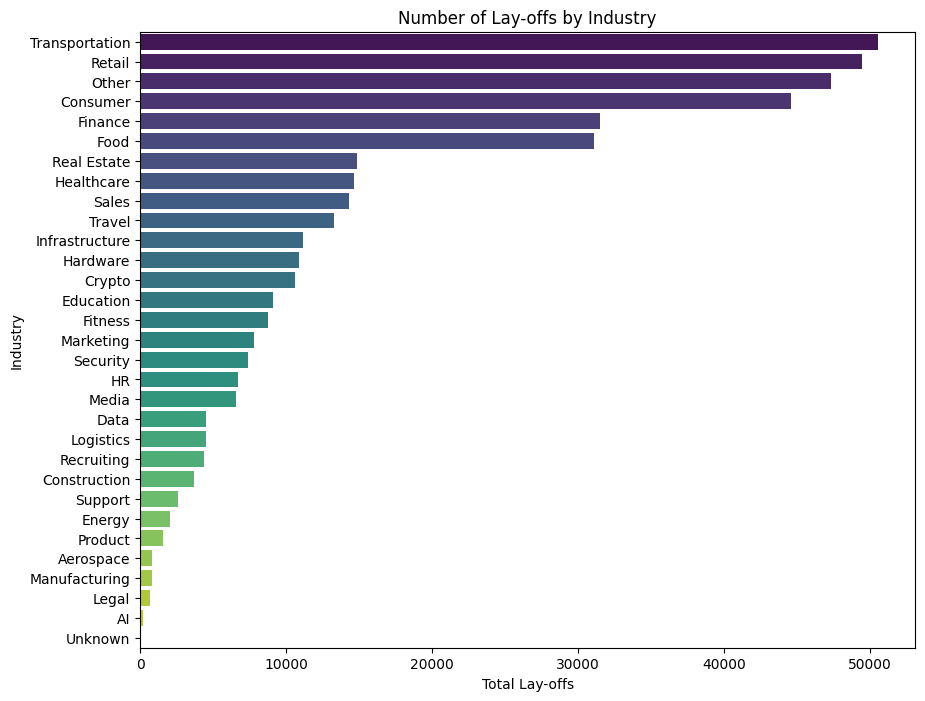

In [27]:


cleaned_data = data.dropna(subset=['Laid_Off_Count'])

industry_layoffs = cleaned_data.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
sns.barplot(x=industry_layoffs.values, y=industry_layoffs.index, palette='viridis')
plt.title('Number of Lay-offs by Industry')
plt.xlabel('Total Lay-offs')
plt.ylabel('Industry')
plt.show()

#Impact of Company funding on Lay-offs

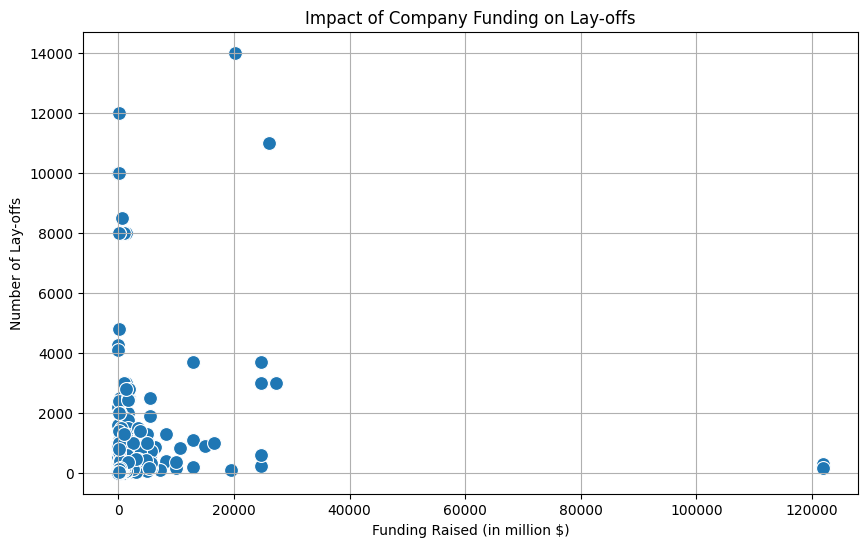

In [28]:
cleaned_data = data.dropna(subset=['Funds_Raised', 'Laid_Off_Count'])

# Tạo scatter plot để phân tích mối quan hệ giữa số tiền gọi vốn và số lượng nhân viên bị sa thải
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Funds_Raised', y='Laid_Off_Count', data=cleaned_data, s=100)
plt.title('Impact of Company Funding on Lay-offs')
plt.xlabel('Funding Raised (in million $)')
plt.ylabel('Number of Lay-offs')
plt.grid(True)
plt.show()

#Average Number of Lay-Offs by Company Stage


<ipython-input-29-77818329cf70>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




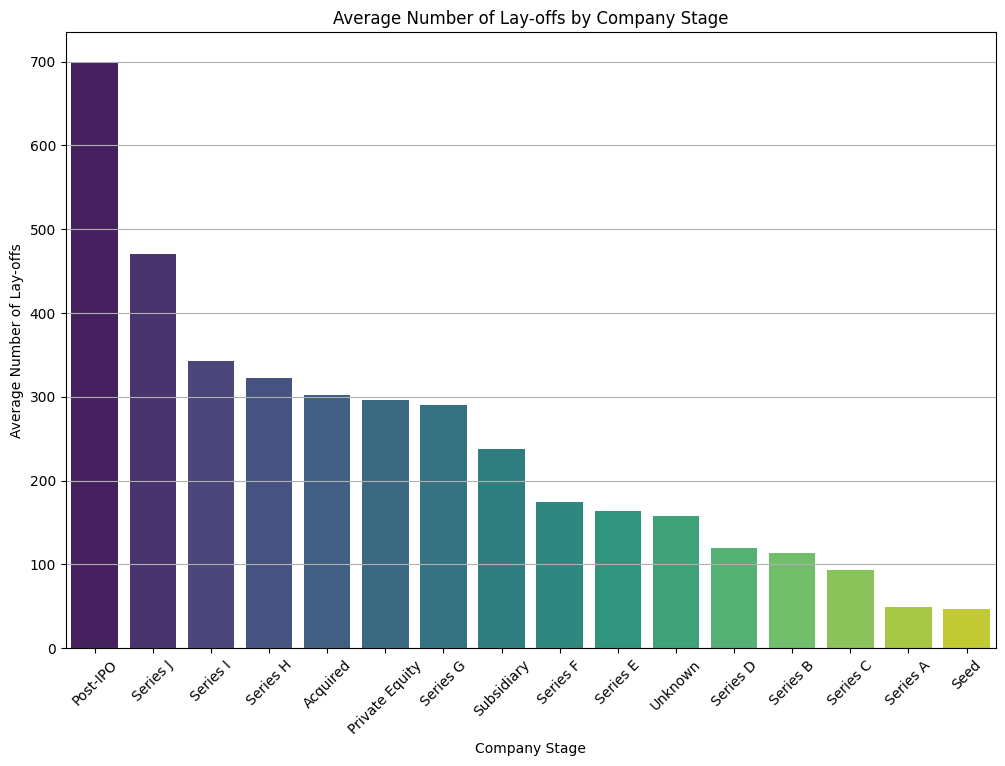

In [29]:
cleaned_data = data.dropna(subset=['Laid_Off_Count', 'Stage'])

average_layoffs_by_stage = cleaned_data.groupby('Stage')['Laid_Off_Count'].mean().sort_values(ascending=False)

# Tạo biểu đồ bar
plt.figure(figsize=(12, 8))
sns.barplot(x=average_layoffs_by_stage.index, y=average_layoffs_by_stage.values, palette='viridis')
plt.title('Average Number of Lay-offs by Company Stage')
plt.xlabel('Company Stage')
plt.ylabel('Average Number of Lay-offs')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
plt.grid(True, axis='y')  # Hiển thị lưới dọc cho trục y
plt.show()